## Latihan Jezebel

In [1]:
import openmc
%matplotlib inline

In [2]:
Pu_metal_sphere = openmc.Material()
Pu_metal_sphere.add_nuclide("Pu239", 3.7047E-2)
Pu_metal_sphere.add_nuclide("Pu240", 1.7512E-3)
Pu_metal_sphere.add_nuclide("Pu241", 1.1674E-4)
Pu_metal_sphere.add_element("Ga", 1.3752E-3)

Spherical_nickel_coating = openmc.Material()
Spherical_nickel_coating.add_element("Ni", 9.3122E-2)

materials = openmc.Materials([Pu_metal_sphere, Spherical_nickel_coating])
materials.export_to_xml()
!cat materials.xml

<?xml version='1.0' encoding='utf-8'?>
<materials>
  <material depletable="true" id="1">
    <density units="sum"/>
    <nuclide ao="0.037047" name="Pu239"/>
    <nuclide ao="0.0017512" name="Pu240"/>
    <nuclide ao="0.00011674" name="Pu241"/>
    <nuclide ao="0.0008266052159999999" name="Ga69"/>
    <nuclide ao="0.000548594784" name="Ga71"/>
  </material>
  <material id="2">
    <density units="sum"/>
    <nuclide ao="0.063394570818" name="Ni58"/>
    <nuclide ao="0.024419475181999998" name="Ni60"/>
    <nuclide ao="0.001061497678" name="Ni61"/>
    <nuclide ao="0.00338451909" name="Ni62"/>
    <nuclide ao="0.000861937232" name="Ni64"/>
  </material>
</materials>


<?xml version='1.0' encoding='UTF-8'?>
<geometry>
  <cell id="1" material="1" name="fuel" region="-1" universe="1"/>
  <cell id="2" material="2" name="coating" region="-2" universe="1"/>
  <surface boundary="vacuum" coeffs="0.0 0.0 0.0 6.3849" id="1" type="sphere"/>
  <surface coeffs="0.0 0.0 0.0 6.3976" id="2" type="sphere"/>
</geometry>


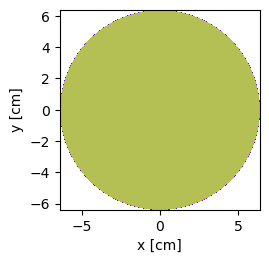

In [3]:
Pu_sphere = openmc.Sphere(r=6.3849, boundary_type='vacuum')
fuel = openmc.Cell(name="fuel")
fuel.fill = Pu_metal_sphere
fuel.region = -Pu_sphere

Nickel_coating = openmc.Sphere(r=6.3976)
coating = openmc.Cell(name="coating")
coating.fill = Spherical_nickel_coating
coating.region = -Nickel_coating

geom = openmc.Geometry([fuel, coating])
geom.plot()
geom.export_to_xml()
!cat geometry.xml

In [4]:
# Finally, define some run settings
settings = openmc.Settings()
settings.batches = 200
settings.inactive = 10
settings.particles = 100000
settings.export_to_xml()

# Run the simulation
openmc.run()

# Get the resulting k-effective value
n = settings.batches
with openmc.StatePoint(f'statepoint.{n}.h5') as sp:
    keff = sp.keff
    print(f'Final k-effective = {keff}')

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################